# Case Study - `adult income` dataset

this dataset has beem taken from the famous UCI ML reposetoru. The goal of this notebook is to accurately predict whether ornot an adult mk=akes more than 50000 us dollars

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\Tanvi\Downloads\Data454 (1)\Data\adult_income.csv")
df

age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing      Husband  White    Male   
2      Married-civ-spouse    Protective-serv      Husband  White    Male   
3      Married-civ-spouse  Machine-op-inspct      Husband  Black    Male   
4           Never-married                  ?    Own-child  White  Female   
...                   ...                ...          ...    ...     ...   
48837  Married-civ-spouse       Tech-support         Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
48839             Widowed       Adm-clerical    Unmarried  White  Female   
48840       Never-married       Adm-clerical    Own-child  White    Male   
48841  Married-civ-spouse    Exec-managerial         Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0                 0             0              40  United-States  <=50K  
1                 0             0              50  United-States  <=50K  
2                 0             0              40  United-States   >50K  
3              7688             0              40  United-States   >50K  
4                 0             0              30  United-States  <=50K  
...             ...           ...             ...            ...    ...  
48837             0             0              38  United-States  <=50K  
48838             0             0              40  United-States   >50K  
48839             0             0              40  United-States  <=50K  
48840             0             0              20  United-States  <=50K  
48841         15024             0              40  United-States   >50K  

[48842 rows x 15 columns]

In [4]:
df.shape

(48842, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Observations :
1. Appearantly , it looks like there are no missing values in the dataset.
2. There are 6 numerical and 9 categorical cols.
3. This dataset is using 5.6+ MB of memory.

In [6]:
df.describe()

age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000

In [7]:
df.describe(exclude = 'number')

workclass education      marital-status      occupation relationship  \
count      48842     48842               48842           48842        48842   
unique         9        16                   7              15            6   
top      Private   HS-grad  Married-civ-spouse  Prof-specialty      Husband   
freq       33906     15784               22379            6172        19716   

         race gender native-country income  
count   48842  48842          48842  48842  
unique      5      2             42      2  
top     White   Male  United-States  <=50K  
freq    41762  32650          43832  37155

# Data Quality Issues
1. duplicate
2. Missing values
3. Outliers
4. Type casting
5. noisy or inconsistent data

### Handing Noisy data

In [8]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [9]:
df.columns = df.columns.str.replace('-' , '_')

In [10]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [11]:
df['age'].unique()

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86])

In [12]:
df['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [13]:
df['fnlwgt'].unique()

array([226802,  89814, 336951, ..., 129912, 255835, 257302])

In [14]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [15]:
df['educational_num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14, 16,  3, 11,  5,  8,  2,  1])

In [16]:
df['marital_status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [17]:
df['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [18]:
df['relationship'].unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [19]:
df['race'].unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [20]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [21]:
df['capital_gain'].unique()

array([    0,  7688,  3103,  6418,  7298,  3908, 14084,  5178, 15024,
       99999,  2597,  2907,  4650,  6497,  1055,  5013, 27828,  4934,
        4064,  3674,  2174, 10605,  3418,   114,  2580,  3411,  4508,
        4386,  8614, 13550,  6849,  2463,  3137,  2885,  2964,  1471,
       10566,  2354,  1424,  1455,  3325,  4416, 25236,   594,  2105,
        4787,  2829,   401,  4865,  1264,  1506, 10520,  3464,  2653,
       20051,  4101,  1797,  2407,  3471,  1086,  1848, 14344,  1151,
        2993,  2290, 15020,  9386,  2202,  3818,  2176,  5455, 11678,
        7978,  7262,  6514, 41310,  3456,  7430,  2414,  2062, 34095,
        1831,  6723,  5060, 15831,  2977,  2346,  3273,  2329,  9562,
        2635,  4931,  1731,  6097,   914,  7896,  5556,  1409,  3781,
        3942,  2538,  3887, 25124,  7443,  5721,  1173,  4687,  6612,
        6767,  2961,   991,  2036,  2936,  2050,  1111,  2228, 22040,
        3432,  6360,  2009,  1639, 18481,  2387])

In [22]:
df['capital_loss'].unique()

array([   0, 1721, 1876, 2415, 1887,  625, 1977, 2057, 1429, 1590, 1485,
       2051, 2377, 1672, 1628, 1902, 1602, 1741, 2444, 1408, 2001, 2042,
       1740, 1825, 1848, 1719, 3004, 2179, 1573, 2205, 1258, 2339, 1726,
       2258, 1340, 1504, 2559, 1668, 1974, 1980, 1564, 2547, 2002, 1669,
       1617,  323, 3175, 2472, 2174, 1579, 2129, 1510, 1735, 2282, 1870,
       1411, 1911, 1651, 1092, 1762, 2457, 2231, 2238,  653, 1138, 2246,
       2603, 2392, 1944, 1380, 2465, 1421, 3770, 1594,  213, 2149, 2824,
       1844, 2467, 2163, 1816, 1648, 2206, 2352,  419, 1539,  880,  810,
        974, 4356, 2489, 1755, 3683, 2267, 2080,  155, 3900, 2201, 2754])

In [23]:
df['hours_per_week'].unique()

array([40, 50, 30, 32, 10, 39, 35, 48, 25, 20, 45, 47,  6, 43, 90, 54, 60,
       38, 36, 18, 24, 44, 56, 28, 16, 41, 22, 55, 14, 33, 37,  8, 12, 70,
       15, 75, 52, 84, 42, 80, 68, 99, 65,  5, 17, 72, 53, 29, 96, 21, 46,
        3,  1, 23, 49, 67, 76,  7,  2, 58, 26, 34,  4, 51, 78, 63, 31, 92,
       77, 27, 85, 13, 19, 98, 62, 66, 57, 11, 86, 59,  9, 64, 73, 61, 88,
       79, 89, 74, 69, 87, 97, 94, 82, 91, 81, 95])

In [24]:
df['native_country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [25]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

### Observation :
The col - `workclass , occupation , native_country` are having Noise('?') in the data

In [26]:
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational_num       0
marital_status        0
occupation         2809
relationship          0
race                  0
gender                0
capital_gain          0
capital_loss          0
hours_per_week        0
native_country      857
income                0
dtype: int64

**Note -**
- Replace '?' with np.nan and hence we will handle them with available techniques for handling missing values.

In [27]:
df = df.replace('?' , np.nan)

In [28]:
# Rechecking

In [29]:
df.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational_num    0
marital_status     0
occupation         0
relationship       0
race               0
gender             0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
income             0
dtype: int64

In [30]:
df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational_num       0
marital_status        0
occupation         2809
relationship          0
race                  0
gender                0
capital_gain          0
capital_loss          0
hours_per_week        0
native_country      857
income                0
dtype: int64

In [31]:
df.shape[0]

48842

In [32]:
len(df)

48842

# calculating percentage of missing values in each row

In [33]:
round(df.isnull().sum()/len(df) * 100,2)

age                0.00
workclass          5.73
fnlwgt             0.00
education          0.00
educational_num    0.00
marital_status     0.00
occupation         5.75
relationship       0.00
race               0.00
gender             0.00
capital_gain       0.00
capital_loss       0.00
hours_per_week     0.00
native_country     1.75
income             0.00
dtype: float64

### Observation :
all 3 col are categorical col , we will replace missing values  with mode of that col

In [34]:
df['workclass'].mode()[0]

'Private'

In [35]:
df['occupation'].mode()[0]

'Prof-specialty'

In [36]:
df['native_country'].mode()[0]

'United-States'

In [37]:
df['workclass'] = df['workclass'].fillna(df['workclass'].mode())[0]

In [38]:
df['occupation'] = df['occupation'].fillna(df['occupation'].mode())[0]

In [39]:
df['native_country'] = df['native_country'].fillna(df['native_country'].mode())[0]

In [40]:
# rechecking

df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational_num    0
marital_status     0
occupation         0
relationship       0
race               0
gender             0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
income             0
dtype: int64

# Duplicate data detect and handle

In [41]:
df

age workclass  fnlwgt     education  educational_num  \
0       25   Private  226802          11th                7   
1       38   Private   89814       HS-grad                9   
2       28   Private  336951    Assoc-acdm               12   
3       44   Private  160323  Some-college               10   
4       18   Private  103497  Some-college               10   
...    ...       ...     ...           ...              ...   
48837   27   Private  257302    Assoc-acdm               12   
48838   40   Private  154374       HS-grad                9   
48839   58   Private  151910       HS-grad                9   
48840   22   Private  201490       HS-grad                9   
48841   52   Private  287927       HS-grad                9   

           marital_status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
2      Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
3      Married-civ-spouse  Machine-op-inspct      Husband  Black    Male   
4           Never-married  Machine-op-inspct    Own-child  White  Female   
...                   ...                ...          ...    ...     ...   
48837  Married-civ-spouse  Machine-op-inspct         Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
48839             Widowed  Machine-op-inspct    Unmarried  White  Female   
48840       Never-married  Machine-op-inspct    Own-child  White    Male   
48841  Married-civ-spouse  Machine-op-inspct         Wife  White  Female   

       capital_gain  capital_loss  hours_per_week native_country income  
0                 0             0              40  United-States  <=50K  
1                 0             0              50  United-States  <=50K  
2                 0             0              40  United-States   >50K  
3              7688             0              40  United-States   >50K  
4                 0             0              30  United-States  <=50K  
...             ...           ...             ...            ...    ...  
48837             0             0              38  United-States  <=50K  
48838             0             0              40  United-States   >50K  
48839             0             0              40  United-States  <=50K  
48840             0             0              20  United-States  <=50K  
48841         15024             0              40  United-States   >50K  

[48842 rows x 15 columns]

In [42]:
df.shape

(48842, 15)

In [43]:
df.duplicated().sum()

np.int64(202)

In [44]:
df.drop_duplicates(inplace = True)

In [45]:
df.shape

(48640, 15)

# Detecting and handling outliers

### Detecting outliers with IQR method

In [46]:
def detect_outliers_iqr(df , col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    lb = q1 - 1.5 * iqr
    ub = q3 + 1.5 * iqr

    # filter out the rows where the col values are outside of lb and ub
    out = df[(df[col] < lb) | (df[col] > ub)]
    return out

In [48]:
# to only select numerical cols

num_df = df.select_dtypes(include = 'number')

In [49]:
num_df

age  fnlwgt  educational_num  capital_gain  capital_loss  \
0       25  226802                7             0             0   
1       38   89814                9             0             0   
2       28  336951               12             0             0   
3       44  160323               10          7688             0   
4       18  103497               10             0             0   
...    ...     ...              ...           ...           ...   
48837   27  257302               12             0             0   
48838   40  154374                9             0             0   
48839   58  151910                9             0             0   
48840   22  201490                9             0             0   
48841   52  287927                9         15024             0   

       hours_per_week  
0                  40  
1                  50  
2                  40  
3                  40  
4                  30  
...               ...  
48837              38  
48838              40  
48839              40  
48840              20  
48841              40  

[48640 rows x 6 columns]

In [50]:
num_df.columns

Index(['age', 'fnlwgt', 'educational_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [52]:
for col in num_df.columns:
    print(detect_outliers_iqr(num_df , col))

       age  fnlwgt  educational_num  capital_gain  capital_loss  \
193     79   48574                4             0             0   
234     80  201092                9             0             0   
899     90  149069               12             0          1825   
926     79   27457               14             0             0   
951     80  138050                9             0             0   
...    ...     ...              ...           ...           ...   
48558   90  313749                9             0             0   
48648   90  214594                4          2653             0   
48740   85   98611               13             0             0   
48775   82  403910                9             0             0   
48806   81  120478               11             0             0   

       hours_per_week  
193                40  
234                30  
899                50  
926                23  
951                16  
...               ...  
48558              25  
486

# Removing outliers

In [ ]:
def remove_outliers_iqr(df , col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    lb = q1 - 1.5 * iqr
    ub = q3 + 1.5 * iqr

    # select only the rows where the col values are inside of lb and ub
    clean_df = df[(df[col] > lb) & (df[col] < ub)]
    return clean_df

# Detecting outliers using z-score

In [ ]:
def detect_outliers_zscore(df , col , threshold = 3):
    mean_val = df[col].mean()
    std_val = df[col].std()

    # calculate z - score
    df['Zscore'] = (df[col] - mean_val) / std_val

    # filter rows where z score is greater than threshold
    out = df[(df['Zscore'] < -3) | (df['Zscore'] > 3)]
    return out

In [57]:
def remove_outliers_zscore(df , col , threshold = 3):
    mean_val = df[col].mean()
    std_val = df[col].std()

    # calculate z - score
    df['Zscore'] = (df[col] - mean_val) / std_val

    # filter rows where z score is greater than threshold
    clean_df = df[(df['Zscore'] > -3) & (df['Zscore'] < 3)]
    return clean_df

In [58]:
remove_outliers_zscore(num_df , 'age')

age  fnlwgt  educational_num  capital_gain  capital_loss  \
0       25  226802                7             0             0   
1       38   89814                9             0             0   
2       28  336951               12             0             0   
3       44  160323               10          7688             0   
4       18  103497               10             0             0   
...    ...     ...              ...           ...           ...   
48837   27  257302               12             0             0   
48838   40  154374                9             0             0   
48839   58  151910                9             0             0   
48840   22  201490                9             0             0   
48841   52  287927                9         15024             0   

       hours_per_week    Zscore  
0                  40 -0.996988  
1                  50 -0.048819  
2                  40 -0.778180  
3                  40  0.388797  
4                  30 -1.507540  
...               ...       ...  
48837              38 -0.851116  
48838              40  0.097053  
48839              40  1.409901  
48840              20 -1.215796  
48841              40  0.972285  

[48455 rows x 7 columns]

# Detecting outliers using box plot

<Axes: >

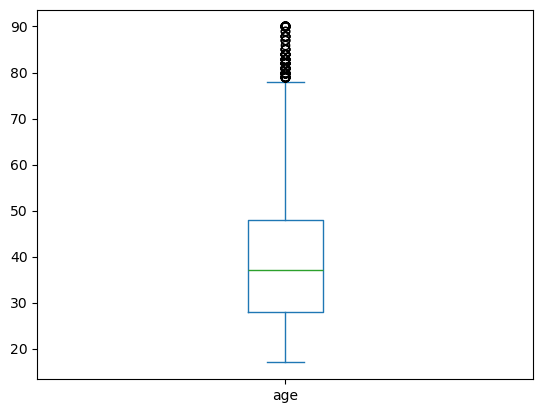

In [59]:
df['age'].plot(kind = 'box')

# Data Analysis - report generation

In [64]:
df

age workclass  fnlwgt     education  educational_num  \
0       25   Private  226802          11th                7   
1       38   Private   89814       HS-grad                9   
2       28   Private  336951    Assoc-acdm               12   
3       44   Private  160323  Some-college               10   
4       18   Private  103497  Some-college               10   
...    ...       ...     ...           ...              ...   
48837   27   Private  257302    Assoc-acdm               12   
48838   40   Private  154374       HS-grad                9   
48839   58   Private  151910       HS-grad                9   
48840   22   Private  201490       HS-grad                9   
48841   52   Private  287927       HS-grad                9   

           marital_status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
2      Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
3      Married-civ-spouse  Machine-op-inspct      Husband  Black    Male   
4           Never-married  Machine-op-inspct    Own-child  White  Female   
...                   ...                ...          ...    ...     ...   
48837  Married-civ-spouse  Machine-op-inspct         Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
48839             Widowed  Machine-op-inspct    Unmarried  White  Female   
48840       Never-married  Machine-op-inspct    Own-child  White    Male   
48841  Married-civ-spouse  Machine-op-inspct         Wife  White  Female   

       capital_gain  capital_loss  hours_per_week native_country income  \
0                 0             0              40  United-States  <=50K   
1                 0             0              50  United-States  <=50K   
2                 0             0              40  United-States   >50K   
3              7688             0              40  United-States   >50K   
4                 0             0              30  United-States  <=50K   
...             ...           ...             ...            ...    ...   
48837             0             0              38  United-States  <=50K   
48838             0             0              40  United-States   >50K   
48839             0             0              40  United-States  <=50K   
48840             0             0              20  United-States  <=50K   
48841         15024             0              40  United-States   >50K   

      Income_category  
0          Low income  
1          Low income  
2         High income  
3         High income  
4          Low income  
...               ...  
48837      Low income  
48838     High income  
48839      Low income  
48840      Low income  
48841     High income  

[48640 rows x 16 columns]

In [60]:
df['income'].value_counts()

income
<=50K    36985
>50K     11655
Name: count, dtype: int64

In [61]:
df['Income_category'] = df['income'].replace(['<=50K' , '>50K'] , ['Low income' , 'High income'])

In [62]:
df['Income_category'].value_counts()

Income_category
Low income     36985
High income    11655
Name: count, dtype: int64

In [63]:
# find the numer of individuals who have high and low income gender wise

In [65]:
df.pivot_table(index = ['Income_category' , 'gender'] , values = 'income' , aggfunc = 'count')

income
Income_category gender        
High income     Female    1768
                Male      9887
Low income      Female   14372
                Male     22613

In [66]:
df.pivot_table(index = ['Income_category' , 'gender' , 'race'] , values = 'income' , aggfunc = 'count')

income
Income_category gender race                      
High income     Female Amer-Indian-Eskimo      15
                       Asian-Pac-Islander      69
                       Black                  132
                       Other                   11
                       White                 1541
                Male   Amer-Indian-Eskimo      40
                       Asian-Pac-Islander     340
                       Black                  434
                       Other                   39
                       White                 9034
Low income      Female Amer-Indian-Eskimo     170
                       Asian-Pac-Islander     448
                       Black                 2173
                       Other                  144
                       White                11437
                Male   Amer-Indian-Eskimo     245
                       Asian-Pac-Islander     658
                       Black                 1940
                       Other                  212
                       White                19558